In [124]:
%pwd
%cd ../..

/


In [125]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from deeplifting.problems import PROBLEMS_BY_NAME
from deeplifting.optimization import (
    run_deeplifting,
    run_differential_evolution,
    run_dual_annealing,
    run_ipopt,
    run_pygranso,
)

In [126]:
problem_name = 'sine_envelope'
problem = PROBLEMS_BY_NAME[problem_name]

In [127]:
outputs = run_pygranso(problem, trials=10)

pygranso_results = pd.DataFrame(
    outputs['final_results'],
    columns=['x1', 'x2', 'f', 'b'],
)
pygranso_results = pygranso_results.add_prefix('pygranso_')

n_gpus: 0


╔═════ QP SOLVER NOTICE ════════════════════════════════════════════════════════════════════════╗
║  PyGRANSO requires a quadratic program (QP) solver that has a quadprog-compatible interface,  ║
║  the default is osqp. Users may provide their own wrapper for the QP solver.                  ║
║  To disable this notice, set opts.quadprog_info_msg = False                                   ║
╚═══════════════════════════════════════════════════════════════════════════════════════════════╝
═════════════════════════════════════════════════════════════════════════════════════════════════════════════════╗
PyGRANSO: A PyTorch-enabled port of GRANSO with auto-differentiation                                             ║ 
Version 1.2.0                                                                                                    ║ 
Licensed under the AGPLv3, Copyright (C) 2021-2022 Tim Mitchell and Buyun Liang                                  ║ 
═══════════════════════════════════

In [128]:
outputs = run_ipopt(problem, trials=10)

ipopt_results = pd.DataFrame(outputs['final_results'], columns=['x1', 'x2', 'f'])
ipopt_results = ipopt_results.add_prefix('ipopt_')

In [129]:
outputs = run_dual_annealing(problem, trials=10)

In [130]:
dual_annealing_results = pd.DataFrame(
    outputs['final_results'], columns=['x1', 'x2', 'f']
)
dual_annealing_results = dual_annealing_results.add_prefix('dual_annealing_')

In [131]:
outputs = run_differential_evolution(problem, trials=10)

In [132]:
de_results = pd.DataFrame(
    outputs['final_results'],
    columns=['x1', 'x2', 'f'],
)
de_results = de_results.add_prefix('differential_evolution_')

In [133]:
# de_results

In [134]:
outputs = run_deeplifting(problem, trials=10)

n_gpus: 0
cpu


╔═════ QP SOLVER NOTICE ════════════════════════════════════════════════════════════════════════╗
║  PyGRANSO requires a quadratic program (QP) solver that has a quadprog-compatible interface,  ║
║  the default is osqp. Users may provide their own wrapper for the QP solver.                  ║
║  To disable this notice, set opts.quadprog_info_msg = False                                   ║
╚═══════════════════════════════════════════════════════════════════════════════════════════════╝
══════════════════════════════════════════════════════════════════════════════════════════════╗
PyGRANSO: A PyTorch-enabled port of GRANSO with auto-differentiation                          ║ 
Version 1.2.0                                                                                 ║ 
Licensed under the AGPLv3, Copyright (C) 2021-2022 Tim Mitchell and Buyun Liang               ║ 
══════════════════════════════════════════════════════════════════════════════════════════════╣
Problem spe

In [ ]:
deeplifting_results = pd.DataFrame(
    outputs['final_results'],
    # columns=['x1', 'x2', 'f', 'b'],
    columns=['x1', 'x2', 'f'],
)
deeplifting_results = deeplifting_results.add_prefix('deeplifting_')

In [ ]:
results = pd.concat(
    [
        ipopt_results,
        pygranso_results,
        dual_annealing_results,
        de_results,
        deeplifting_results,
    ],
    axis=1,
)

In [ ]:
results

,ipopt_x1,ipopt_x2,ipopt_f,pygranso_x1,pygranso_x2,pygranso_f,pygranso_b,dual_annealing_x1,dual_annealing_x2,dual_annealing_f,differential_evolution_x1,differential_evolution_x2,differential_evolution_f,deeplifting_x1,deeplifting_x2,deeplifting_f
0,7.0,7.0,2.0,7.0,7.0,2.0,2.0,7.0,7.0,2.0,7.0,7.0,2.0,7.0,7.0,2.0
1,7.0,7.0,2.0,7.0,7.0,2.0,2.0,7.0,7.0,2.0,7.0,7.0,2.0,7.0,7.0,2.0
2,7.0,7.0,2.0,7.0,7.0,2.0,2.0,7.0,7.0,2.0,7.0,7.0,2.0,7.0,7.0,2.0
3,7.0,7.0,2.0,7.0,7.0,2.0,2.0,7.0,7.0,2.0,7.0,7.0,2.0,7.0,7.0,2.0
4,7.0,7.0,2.0,7.0,7.0,2.0,2.0,7.0,7.0,2.0,7.0,7.0,2.0,7.0,7.0,2.0
5,7.0,7.0,2.0,7.0,7.0,2.0,2.0,7.0,7.0,2.0,7.0,7.0,2.0,7.0,7.0,2.0
6,7.0,7.0,2.0,7.0,7.0,2.0,2.0,7.0,7.0,2.0,7.0,7.0,2.0,7.0,7.0,2.0
7,7.0,7.0,2.0,7.0,7.0,2.0,2.0,7.0,7.0,2.0,7.0,7.0,2.0,7.0,7.0,2.0
8,7.0,7.0,2.0,7.0,7.0,2.0,2.0,7.0,7.0,2.0,7.0,7.0,2.0,7.0,7.0,2.0
9,7.0,7.0,2.0,7.0,7.0,2.0,2.0,7.0,7.0,2.0,7.0,7.0,2.0,7.0,7.0,2.0


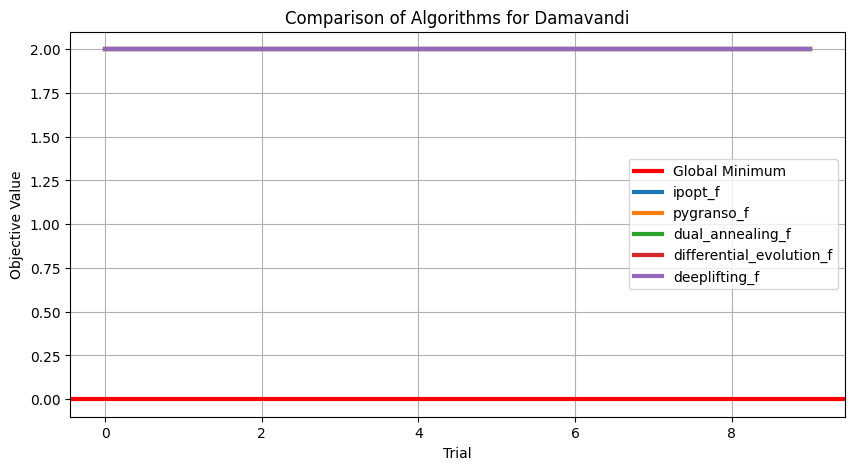

In [ ]:
# Plot the results with the actual global minimum
columns = [
    'ipopt_f',
    'pygranso_f',
    'dual_annealing_f',
    'differential_evolution_f',
    'deeplifting_f',
]

global_minimum = problem['global_minimum']
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# ax.axhline(global_minimum, color='red', lw=3, label='Global Minimum')
results[columns].plot(lw=3, figsize=(10, 5), ax=ax)

problem_title_name = ' '.join([str.capitalize() for str in problem_name.split('_')])
ax.set_title(f'Comparison of Algorithms for {problem_title_name}')
ax.set_xlabel('Trial')
ax.set_ylabel('Objective Value')
ax.grid()
ax.legend()

# fig.savefig(
#     f'/Users/ryandevera/data-science/umn_environments/Deeplifting/images/{problem_name}.png'
# )

fig.savefig(f'/home/seanschweiger/dl_testing/Deeplifting/images/{problem_name}.png')

In [ ]:
# # NLP written by GAMS Convert at 02/17/22 17:18:03
# #
# # Equation counts
# #     Total        E        G        L        N        X        C        B
# #         7        7        0        0        0        0        0        0
# #
# # Variable counts
# #                  x        b        i      s1s      s2s       sc       si
# #     Total     cont   binary  integer     sos1     sos2    scont     sint
# #        14       14        0        0        0        0        0        0
# # FX      0
# #
# # Nonzero counts
# #     Total    const       NL
# #        25        8       17
# #
# # Reformulation has removed 1 variable and 1 equation

# from pyomo.environ import ConcreteModel, Var, Objective, Constraint, SolverFactory

# model = m = ConcreteModel()

# m.x1 = Var(within=Reals, bounds=(0,2), initialize=1.745)
# m.x2 = Var(within=Reals, bounds=(0,1.6), initialize=1.2)
# m.x3 = Var(within=Reals, bounds=(0,1.2), initialize=1.1)
# m.x4 = Var(within=Reals, bounds=(0,5), initialize=3.048)
# m.x5 = Var(within=Reals, bounds=(0,2), initialize=1.974)
# m.x6 = Var(within=Reals, bounds=(0.85,0.93), initialize=0.893)
# m.x7 = Var(within=Reals, bounds=(0.9,0.95), initialize=0.928)
# m.x8 = Var(within=Reals, bounds=(3,12), initialize=8)
# m.x9 = Var(within=Reals, bounds=(1.2,4), initialize=3.6)
# m.x10 = Var(within=Reals, bounds=(1.45,1.62), initialize=1.45)
# m.x11 = Var(within=Reals, bounds=(0.99,1.01010101010101), initialize=1)
# m.x12 = Var(within=Reals, bounds=(0.99,1.01010101010101), initialize=1)
# m.x13 = Var(within=Reals, bounds=(0.9,1.11111111111111), initialize=1)
# m.x14 = Var(within=Reals, bounds=(0.99,1.01010101010101), initialize=1)

# m.obj = Objective(sense=minimize, expr= -6.3 * m.x4 * m.x7 + 5.04 * m.x1 + 0.35
#     * m.x2 + m.x3 + 3.36 * m.x5)

# m.e1 = Constraint(expr= -0.819672131147541 * m.x1 + m.x4 - 0.819672131147541 *
#     m.x5 == 0)
# m.e2 = Constraint(expr= -m.x6 * (0.01 * m.x4 * m.x9 + m.x3) + 0.98 * m.x3 == 0)
# m.e3 = Constraint(expr= -m.x1 * m.x8 + 10 * m.x2 + m.x5 == 0)
# m.e4 = Constraint(expr= m.x4 * m.x11 - m.x1 * (-0.0067 * m.x8 * m.x8 + 0.13167
#     * m.x8 + 1.12) == 0)
# m.e5 = Constraint(expr= m.x7 * m.x12 - 0.01 * (-0.038 * m.x8 * m.x8 + 1.098 *
#     m.x8) - 0.325 * m.x6 == 0.57425)
# m.e6 = Constraint(expr= m.x9 * m.x13 + 22.2 * m.x10 == 35.82)
# m.e7 = Constraint(expr= m.x10 * m.x14 - 3 * m.x7 == -1.33)

In [ ]:
# # Solve the problem
# solver = SolverFactory('ipopt')
# solver.solve(model)

In [ ]:
# model.obj()

In [ ]:
import torch

In [ ]:
torch.randn(1)

tensor([-1.2960])

In [86]:
np.cosh(-50)

2.592352764293536e+21